<a href="https://colab.research.google.com/github/DavidJCullen/Data-Science-Portfolio/blob/main/Hums_and_Whistles_ML_Pipeline_(Binary_Class)_MileEnd_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
from scipy.io.wavfile import read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, re, pickle, glob
import urllib.request
import zipfile
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import IPython.display as ipd
from tqdm import tqdm
import librosa
import librosa.display
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,matthews_corrcoef,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
#from sklearn.pipeline import make_pipelin

#from sklearn.neural_network import MLPClassifier
#drive.mount('/content/drive')

# **1. Problem formulation** 

The machine learning problem is in relation to MLEnd Hums and Whistles dataset. The problem that this  work aims to solve is binary classification, building a machine learning pipeline that takes as an input a Potter or Starwars audio segment and predicts its song and label.

# ****2. Machine Learning pipeline****

The below describes the machine learning pipeline:


### **Data Extraction/Data Preparation**

**Input:** the input audio data in .wav format derives from MLEnd Hums and Whistles Potter and StarWars  public dataset, totalling 417 Potter and 417 StarWars samples. 

### **Transformation:**

***Feature extraction*** is used to extract signal data from the input data. 

***Feature selection*** Filtering using Pearson’s Correlation Coefficient above threhold of 0.50.

***Label Encoding*** converting Potter and StarWars categorical data to Boolean values (True and False).

***Linear tranformation***: of the extracted feature data using MinMaxScaler. 


### **Models:** 

A support Vector Machine, K-nearest neighbour classification and a Stacking Classifier using  LogisticRegression as the final estimator has been used as a model for prediction on the dataset. 

***Output***: Transformed data passed to the machine learning models for training and validation 



### **Model Evaluation:**

Model validation performance evaluated using classification metrics (f-score, precision and recall) and Matthews correlation coefficient (MCC). 

 



# **3.Transformation stage**:

As part of the transformation stage, the following was undertaken:
    
### **Feature extraction**:  

***Input: raw .wav data for Potter and Starwars (417 files for each label):***
    
The original data was in .wav format, in order to reduce dimensionality features were extracted using signal processing functions obtained from the Librosa library. The following features were extracted:
    
**Spectral Features**

1. Mel-frequency cepstral coefficients (MFCCs)(librosa.feature.mfcc)
2. Spectral bandwidth (librosa.feature.spectral_bandwidth)
3. Onset_strength (librosa.onset.onset_strength
    
**Beat and tempo Feature**

1. Tempo Estimation (librosa.beat.tempo)

    
***Output: The features extracted resulted in a 4-dimensional feature vector of features***



### **Feature scaling**:

***Input: Numerical Features:***

The features extracted were normalised using a normalisation technique MinMaxScaler [0,1]. The reason for choosing this feature scaling operation, is that the data from visual inspection was not normally distributed. The intention of using this approach was to preserve the shape of the data. 

***Output: 4 Dimesnional Normalised Feature Array***



### **Label Encoding**:

***Input: Catergocial Data:***

***Output***: Label Encoding converting Potter and StarWars categorical data to Boolean values (True and False).



# 4. Modelling


The following models were implemented:
1.  Support Vector Machine (SVM)classification algorithm. 
2.  K-nearest neighbour classification algorithm.
3.  Ensemble approach - Stacking Classifier using LogisticRegression as the final estimator was used as a metalearner to combine the predictions of each of the above classification algorithms.

# **5 Methodology**


The below decribes how the data was trained and validated, including how accuracy was assessed. 


**Data Split:** : The data was split, namely: training data: training data list comprising of 80% of instances and validation data: comprising of 20% of instances. The randomisation of the training data and validation data were controlled using a random number generator, enabling a deterministic train-test to split to be achieved. The split was stratified such that a balanced proportion of each class was preserved.  

**Predictors and Labels**: An array of normalized features were used as predictors and 'Potter', 'StarWars' were used as y labels for the binary classification exercise.

**Model Training:** The models were trainined on the 80% training data split. A Support Vector Machine (SVM)classification algorithm , K-nearest neighbour classification and StackingClassifier was used. 

The models were trained on the 80% training data split. A Support Vector Machine (SVM)classification algorithm, K-nearest neighbour classification and StackingClassifier was used. 

1. ***Support Vector Machine (SVM)classification algorithm***:   Default parameters were used. C=1.0,kernel='rbf',gamma='scale'

2. ***K-NeighborsClassifier (KNN)***: To avoid ties, odd K numbers were used in a selection of parameters. k was set to 3.

3. ***StackingClassifier***: Stacking Classifier using LogisticRegression as the final estimator was used as a metalearner to combine the predictions of each of the above classification algorithms.

**Model Peformance:** After each model was fitted to the 80% training data split, it was validated on the 20% data split to assess performance. Each models performance was compared using a confusion matrix comparing precision, recall and macro avg f-score.  

A  ***Matthews Correlation Coefficient*** (MCC) testing the correlation between y true labels and y predicted labels. 

# 6. Dataset

The input audio data in .wav format derives from MLEnd Hums and Whistles Potter and StarWars public dataset, totalling 417 Potter and 417 StarWars samples. The below covers the preprocessing and analysis of data:

# Data Preprocessing 

**Get Potter Path**

In [ ]:
#show the potter path
potter_path = '/Users/david/Google Drive/Basic_solution/Potter'
potter_dir=os.listdir(potter_path)
print(f'Total Potter files found: {len(potter_dir)}')
potter_dir.sort()
#potter_dir

Total Potter files found: 417


**Get StarWars Path**

In [ ]:
#show the starwars path

starwars_path = '/Users/david/Google Drive/Basic_solution/StarWars'
starwars_dir=os.listdir(starwars_path)
print(f'Total StarWars files found: {len(starwars_dir)}')
starwars_dir.sort()
#starwars_dir

Total StarWars files found: 417


**Potter File Name Inconsistencies**

Show file naming inconsitencies:

In [ ]:
#standard text used for finding annomolies in file names
text= '*Potter.wav'

#create filelist to store all files located
fileslist, error_file,types=[],[],[]

#main error list
individual_errors=[]

#loop through the potter path and store in temp filelist list 
for f in potter_dir:
  fileslist.append(f)

#loop through the temp filelist, passing on occurances where each indiviudal file is Potter.wav using regex. 
#For files not matching Potter.wav, append them to the error_file temp list. 
for file in fileslist:
    match = re.search("Potter.wav", file)
    if match:
        pass
    else:
         error_file.append(file)
#show error types using the split function to only show the main title
main_title=[]
for file in error_file:
    main_title.append(file.split('_',1)[1:])

for error in main_title:
   #convert error  to tuple to ensure it is hashable
    error = tuple(error)
    individual_errors.append(error)

print(f' The following inconsitent file names have been indentifed:\n')

set(individual_errors)



 The following inconsitent file names have been indentifed:



{('Whistle_1_[Potter].wav',),
 ('harrypotter_hum_2.wav',),
 ('harrypotter_whistle_1.wav',),
 ('hum_1_(potter).wav',),
 ('hum_1_Harry_Potter_Theme_Song.wav',),
 ('hum_1_Potter .wav',),
 ('hum_1_Potter.WAV',),
 ('hum_1_Potter.Wav',),
 ('hum_1_[Potter].wav',),
 ('hum_1_[potter].wav',),
 ('hum_1_harry potter.wav',),
 ('hum_1_potter.wav',),
 ('hum_2_Potter .wav',),
 ('hum_2_Potter.WAV',),
 ('hum_2_Potter.Wav',),
 ('hum_2_potter.wav',),
 ('hum_3_(potter).wav',),
 ('hum_3_Potterwav.wav',),
 ('hum_4_Potter .wav',),
 ('hum_4_[Potter].wav',),
 ('hum_4_[potter].wav',),
 ('whistle_1_Harry_Potter_Theme_Song.wav',),
 ('whistle_1_[Potter] .wav',),
 ('whistle_1_[Potter].wav',),
 ('whistle_1_[potter].wav',),
 ('whistle_2_[Potter] .wav',),
 ('whistle_2_potter.wav',)}

**StarWars File Name Inconsitencies**

In [ ]:
#standard text used for finding annomolies in file names
text= '*StarWars.wav'

#create temp file lists to store files located
fileslist, error_file,types=[],[],[]

#main error list
individual_errors=[]

#loop through the potter directory and store in temp filelist list 
for f in starwars_dir:
  fileslist.append(f)

#loop through the temp file list, passing on occurances where each indiviudal file is Potter.wav using regex. 
#For files not matching Potter.wav, append them to the error_file temp list. 
for file in fileslist:
    match = re.search("StarWars.wav", file)
    if match:
        pass
    else:
         error_file.append(file)
#show error types using the split function to only show the main title
main_title=[]
for file in error_file:
    main_title.append(file.split('_',1)[1:])

for error in main_title:
   #convert error  to tuple to ensure it is hashable
    error = tuple(error)
    individual_errors.append(error)

print(f' The following inconsitent file names have been indentifed:\n')

set(individual_errors)


 The following inconsitent file names have been indentifed:



{('Hum2_StarWar.wav',),
 ('Hum3.StarWar.wav',),
 ('Hum_2_Starwars.wav',),
 ('Whistle_2_Starwars.wav',),
 ('hum2_Imperial_March.wav',),
 ('hum_1_(starwars).wav',),
 ('hum_1_Imperial.wav',),
 ('hum_1_StartWars.wav',),
 ('hum_1_[STARWARS].wav',),
 ('hum_1_[StarWars].wav',),
 ('hum_1_imperial_march.wav',),
 ('hum_2_Starwars.wav',),
 ('hum_2_[ Star Wars ].wav',),
 ('hum_2_[STARWARS].wav',),
 ('hum_2_[StarWars] .wav',),
 ('hum_2_[StarWars].wav',),
 ('hum_2_[StatWars].wav',),
 ('hum_2_starwars.wav',),
 ('hum_3_StarWars.Wav',),
 ('hum_3_StarsWars.wav',),
 ('hum_3_Starwars.WAV',),
 ('hum_3_Starwars.wav',),
 ('hum_3_[ Star Wars ].wav',),
 ('hum_3_[StarWars].wav',),
 ('hum_3_[Starwars].wav',),
 ('hum_3_star wars.wav',),
 ('hum_3_starwars.wav',),
 ('hum_4_(starwars).wav',),
 ('hum_4_StarWars.Wav',),
 ('hum_4_StarsWars.wav',),
 ('hum_4_Starwars.WAV',),
 ('hum_4_Starwars.wav',),
 ('hum_4_[StarWars].wav',),
 ('hum_4_[Starwars].wav',),
 ('hum_4_star wars.wav',),
 ('hum_4_starwars.wav',),
 ('starwars_h

### ***As shown above several files have not followed the required naming requirements. When storing the data into a dataframe later on, a function will be used capture innconsistencies if needed.***

**Get Potter Files**

In [ ]:

potter_path_files='/Users/david/Google Drive/Basic_solution/Potter/*'
#store files in variable
potter_contents=glob.glob(potter_path_files)

**Get Starwars Files**

In [ ]:
starwars_path_files='/Users/david/Google Drive/Basic_solution/StarWars/*'
#store files in variable
starwars_contents=glob.glob(starwars_path_files)

**Store Potter files infomation in list data structures:**



In [ ]:
#lists to temp store info
p_listoffilesnames,p_listoffiletypes,p_listofids=[],[],[]


#loop through files and capture hum and whistles
for c in potter_contents:
  hum=['hum','Hum']
  whistle=['Whistle','whistle','whisle']
  
  #append the hums to list
  for h in hum:
     if h in c:
       p_listoffiletypes.append('Hum')
#append the whistles to list
  for w in whistle:
     if w in c:
       p_listoffiletypes.append('Whistle')
 
#append the file names to a list
for c in potter_contents:
   p_listoffilesnames.append('Potter')
#append ID to a list
for c in potter_contents:
  id=c.split('_')[1].split('/')[-1]
  p_listofids.append(id)


**Create Potter Dataframe:**

In [ ]:
#dataframe that captures the song and type 
p_recordings_df=pd.DataFrame((p_listoffilesnames),columns=['Song'])
p_recordings_df['Song']=p_listoffilesnames
p_recordings_df['Filepath']=potter_contents
p_recordings_df['Song ID']=p_listofids
p_recordings_df['Type']=p_listoffiletypes
p_recordings_df.head()

Song                                           Filepath Song ID Type
0  Potter  /Users/david/Google Drive/Basic_solution/Potte...     S54  Hum
1  Potter  /Users/david/Google Drive/Basic_solution/Potte...    S135  Hum
2  Potter  /Users/david/Google Drive/Basic_solution/Potte...     S36  Hum
3  Potter  /Users/david/Google Drive/Basic_solution/Potte...    S157  Hum
4  Potter  /Users/david/Google Drive/Basic_solution/Potte...    S169  Hum

**Store StarWars files infomation in list data structures:**

In [ ]:
#lists to temp store info
s_listoffilesnames,s_listoffiletypes,s_listofids=[],[],[]


#loop through files and capture hum and whistles
for c in starwars_contents:
  hum=['hum','Hum']
  whistle=['Whistle','whistle','whislte','whisle']
  
  #append the hums to list
  for h in hum:
     if h in c:
       s_listoffiletypes.append('Hum')
       
#append the whistles to list
  for w in whistle:
     if w in c:
       s_listoffiletypes.append('Whistle')    
    
#append the file names to a list
for c in starwars_contents:
   s_listoffilesnames.append('StarWars')

#append ID to a list
for c in starwars_contents:
  id=c.split('_')[1].split('/')[-1]
  s_listofids.append(id)


**Create Starwars Dataframe:**

In [ ]:
s_recordings_df=pd.DataFrame((s_listoffilesnames),columns=['Song'])
s_recordings_df['Song']=s_listoffilesnames
s_recordings_df['Filepath']=starwars_contents
s_recordings_df['Song ID']=s_listofids
s_recordings_df['Type']=s_listoffiletypes
s_recordings_df

Song                                           Filepath Song ID  \
0    StarWars  /Users/david/Google Drive/Basic_solution/StarW...    S180   
1    StarWars  /Users/david/Google Drive/Basic_solution/StarW...    S216   
2    StarWars  /Users/david/Google Drive/Basic_solution/StarW...     S23   
3    StarWars  /Users/david/Google Drive/Basic_solution/StarW...     S86   
4    StarWars  /Users/david/Google Drive/Basic_solution/StarW...    S216   
..        ...                                                ...     ...   
412  StarWars  /Users/david/Google Drive/Basic_solution/StarW...    S190   
413  StarWars  /Users/david/Google Drive/Basic_solution/StarW...     S48   
414  StarWars  /Users/david/Google Drive/Basic_solution/StarW...    S135   
415  StarWars  /Users/david/Google Drive/Basic_solution/StarW...    S133   
416  StarWars  /Users/david/Google Drive/Basic_solution/StarW...    S156   

        Type  
0    Whistle  
1        Hum  
2        Hum  
3        Hum  
4        Hum  
..       ...  
412      Hum  
413  Whistle  
414      Hum  
415  Whistle  
416      Hum  

[417 rows x 4 columns]

**Concatenate Potter and Starwars DataFrames**

Concatenate the above dataframes. Concatenate the above dataframes. Parts of this dataframe will be used in the features dataframe later on.

In [ ]:
frames=(p_recordings_df,s_recordings_df)
dataframe=pd.concat(frames)
dataframe

Song                                           Filepath Song ID  \
0      Potter  /Users/david/Google Drive/Basic_solution/Potte...     S54   
1      Potter  /Users/david/Google Drive/Basic_solution/Potte...    S135   
2      Potter  /Users/david/Google Drive/Basic_solution/Potte...     S36   
3      Potter  /Users/david/Google Drive/Basic_solution/Potte...    S157   
4      Potter  /Users/david/Google Drive/Basic_solution/Potte...    S169   
..        ...                                                ...     ...   
412  StarWars  /Users/david/Google Drive/Basic_solution/StarW...    S190   
413  StarWars  /Users/david/Google Drive/Basic_solution/StarW...     S48   
414  StarWars  /Users/david/Google Drive/Basic_solution/StarW...    S135   
415  StarWars  /Users/david/Google Drive/Basic_solution/StarW...    S133   
416  StarWars  /Users/david/Google Drive/Basic_solution/StarW...    S156   

        Type  
0        Hum  
1        Hum  
2        Hum  
3        Hum  
4        Hum  
..       ...  
412      Hum  
413  Whistle  
414      Hum  
415  Whistle  
416      Hum  

[834 rows x 4 columns]

### Class Balance

The classes are balanced.

In [ ]:
potter=dataframe[dataframe['Song'].str.contains('Potter')].count()
starwars=dataframe[dataframe['Song'].str.contains('StarWars')].count()

hums=dataframe[dataframe['Type'].str.contains('Hum')].count()
whistle=dataframe[dataframe['Type'].str.contains('Whistle')].count()

potter_hum=dataframe[(dataframe["Type"]=='Hum') & (dataframe["Song"]=='Potter')].count()
potter_whistle=dataframe[(dataframe["Type"]=='Whistle') & (dataframe["Song"]=='Potter')].count()



starWars_hum=dataframe[(dataframe["Type"]=='Hum') & (dataframe["Song"]=='StarWars')].count()
starWars_whistle=dataframe[(dataframe["Type"]=='Whistle') & (dataframe["Song"]=='StarWars')].count()
print('-------------------------------')
print(f'The total Potter  count is: {potter.Song}')
print(f'The total Potter  count is: {starwars.Song}')

print('-------------------------------')

print(f'The total Potter Hum count is: {potter_hum.Song}')
print(f'The total StarWars Hum count is: {starWars_hum.Song}')
print(f'The total Potter Whistle count is: {potter_hum.Song}')
print(f'The total StarWars Whistle count is: {starWars_whistle.Song}')


-------------------------------
The total Potter  count is: 417
The total Potter  count is: 417
-------------------------------
The total Potter Hum count is: 294
The total StarWars Hum count is: 304
The total Potter Whistle count is: 294
The total StarWars Whistle count is: 113


## **Data Exploration**

The below shows key visuals of data.

The below shows the amplitude of data for Potter and StarWars samples. The above dataframes enable information to be easily provided about the below plots (Song,Type Song ID, File name) .

The amplitude pattern of Potter seems to differ than StarWars over time intervals. This could be used to as feature. 

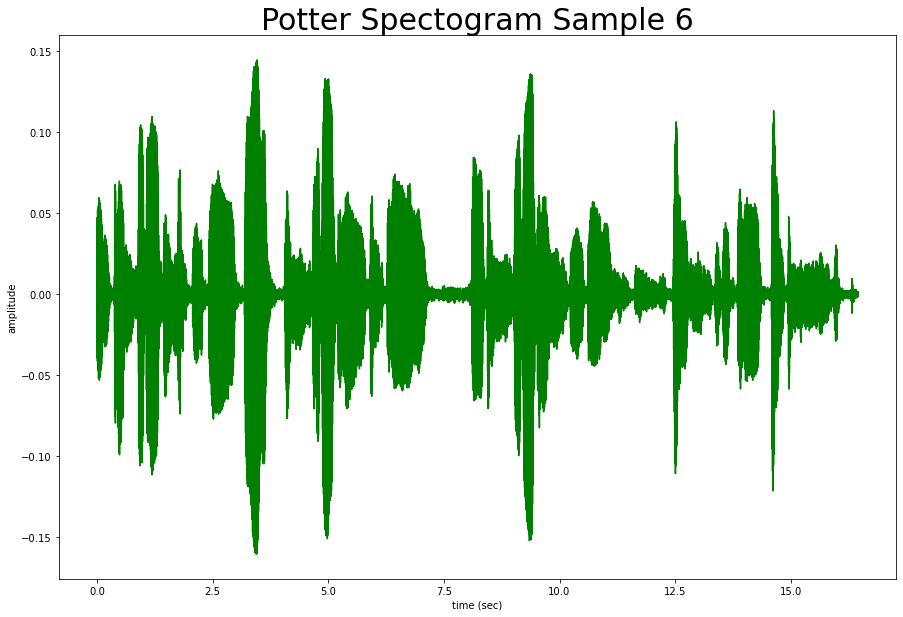

Song                                                   Potter
Filepath    /Users/david/Google Drive/Basic_solution/Potte...
Song ID                                                   S53
Type                                                      Hum
Name: 6, dtype: object

In [ ]:
n=6

plt.figure(figsize=(15, 10))
fs = None # Sampling frequency. If None, fs would be 22050
x, sr = librosa.load(potter_contents[n],sr=None)
t = np.arange(len(x))/sr
plt.plot(t,x,c='g')
plt.title(f'Potter Spectogram Sample {n}',size=30)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
print('\n')
display(p_recordings_df.iloc[n])
print('\n')
display(ipd.Audio(potter_contents[n]))

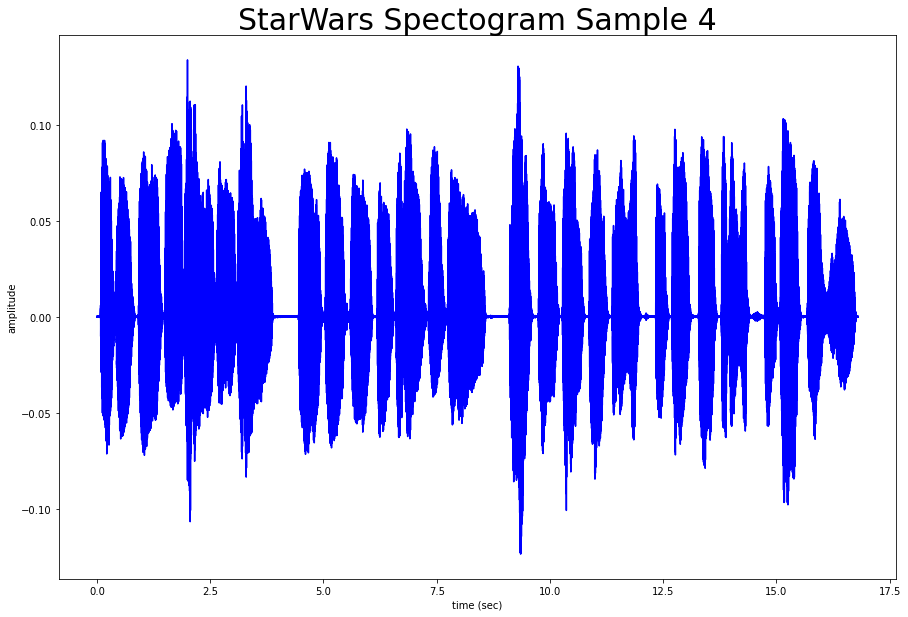

Song                                                 StarWars
Filepath    /Users/david/Google Drive/Basic_solution/StarW...
Song ID                                                  S216
Type                                                      Hum
Name: 4, dtype: object

In [ ]:
#play a selected song and show what it has been labled as in the below dataframe
plt.figure(figsize=(15, 10))
n=4


#fs = None # Sampling frequency. If None, fs would be 22050
x, sr = librosa.load(starwars_contents[n],sr=None)
t = np.arange(len(x))/sr
plt.plot(t,x,c='b')
plt.title(f'StarWars Spectogram Sample {n}',size=30)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
print('\n')
display(s_recordings_df.iloc[n])
print('\n')
display(ipd.Audio(starwars_contents[n]))

**Plot Potter songs to a Spectrogram, using the Short Term Fourier Transform as a function:**

Possibility to use the Fourier transform as a feature, showing how the frequency over time.

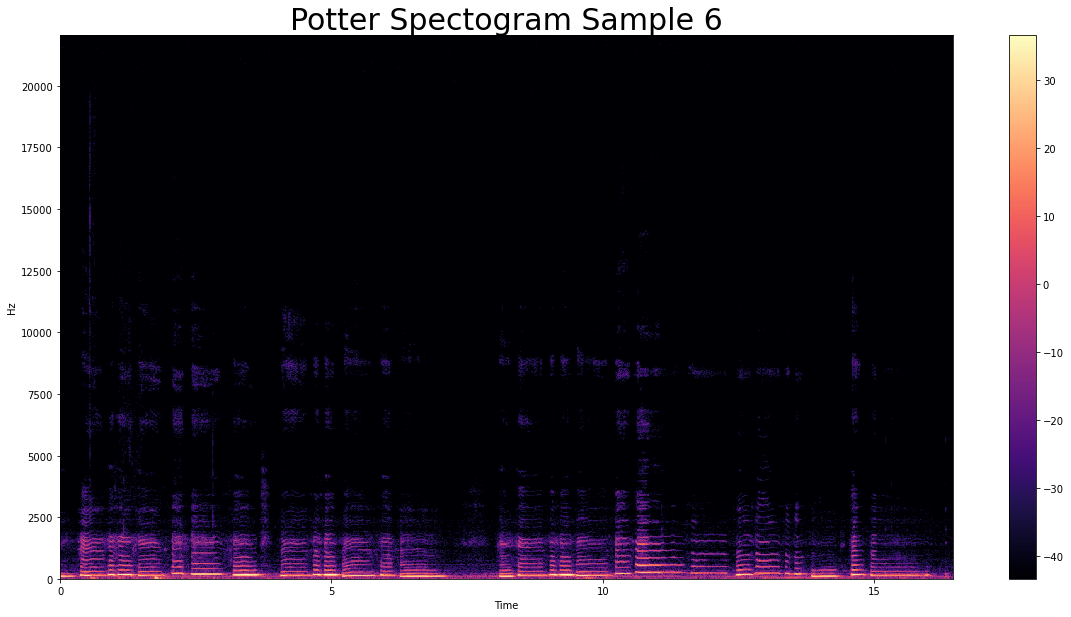

In [ ]:
#display Spectrogram
import librosa.display
n=6
x, sr = librosa.load(potter_contents[n],sr=None)
#converts data into short term Fourier transform.Fourier 
#Transform is a function that gets a signal in the time domain as input, and outputs its decomposition into frequencies.
X = librosa.stft(x)


#transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, simuler to a log scale of amplitudes.
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20,10))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

plt.title(f'Potter Spectogram Sample {n}',size=30)
plt.colorbar()

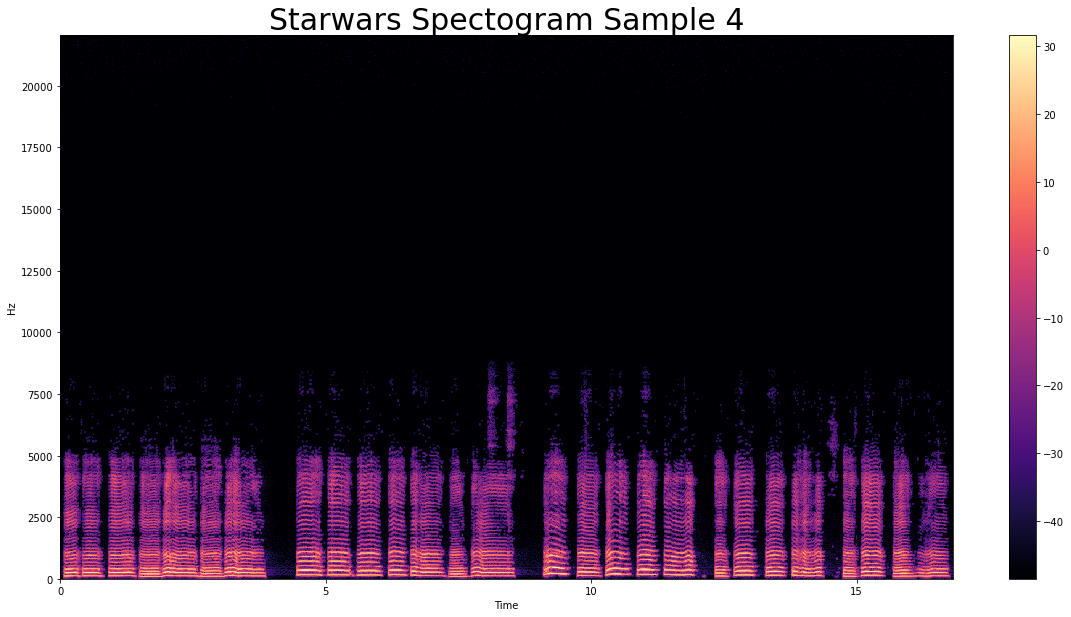

In [ ]:
#display Spectrogram
import librosa.display
n=4
x, sr = librosa.load(starwars_contents[n],sr=None)
#converts data into short term Fourier transform.
#Fourier Transform is a function that gets a signal in the time domain as input, and outputs its decomposition into frequencies.
X = librosa.stft(x)
#transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, simiular to a log scale of amplitudes.
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20,10))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

plt.title(f'Starwars Spectogram Sample {n}',size=30)

plt.colorbar()

**Concatenate all files for feature extraction***

In [ ]:
#Concatenate the Potter files and StarWars files for feature extraction. 

potter_star=potter_contents+starwars_contents

**Feature Extraction**

Extract features using the Librosa libary.

In [ ]:
#lists of features
mfcc_list,onset_env_list,spec_bw_list,tempo_list=[],[],[],[]

for i in tqdm(range(len(potter_star))):
  n=i

  y, sr = librosa.load(potter_star[n],sr=None)
    
  mfcc = librosa.feature.mfcc(y=y, sr=sr) 
  mfcc_list.append(np.mean(mfcc))  
  
  onset_env = librosa.onset.onset_strength(y=y, sr=sr)
  onset_env_list.append(np.mean(onset_env))
  
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
  spec_bw_list.append(np.mean(spec_bw))

  tempo = librosa.beat.tempo(y, sr=sr)
  tempo_list.append(tempo)
    



100%|██████████| 834/834 [03:39<00:00,  3.80it/s]


**Dataframe for each song and extracted feature**

In [ ]:

#create dataframe with features and Labels
song=dataframe['Song'].tolist()
df=pd.DataFrame(song,columns=['Song'])
df['mfcc']=mfcc_list
df['onset_env']=onset_env_list
df['Spec_Bandwidth']=spec_bw_list
df['tempo']=tempo_list
df

Song       mfcc  onset_env  Spec_Bandwidth                 tempo
0      Potter -10.172560   1.269861     3065.165898          [123.046875]
1      Potter -16.612434   0.690436     3177.825718  [151.99908088235293]
2      Potter -23.334318   1.113155     2873.497796           [105.46875]
3      Potter -22.287611   0.924787     3112.003116  [132.51201923076923]
4      Potter -18.113436   1.259196     4246.474464  [126.04801829268293]
..        ...        ...        ...             ...                   ...
829  StarWars -16.105360   1.377613     3112.447059          [103.359375]
830  StarWars -19.166555   0.874386     3009.801995   [97.50884433962264]
831  StarWars -15.272026   0.868934     2804.135389  [101.33272058823529]
832  StarWars -17.962402   0.956915     4198.495497       [107.666015625]
833  StarWars -31.253525   0.873777     4796.683804          [103.359375]

[834 rows x 5 columns]

**Understand Dataframe Datatypes**

Explore the dtypes of the extracted features 

In [ ]:
df.dtypes

Song               object
mfcc              float64
onset_env         float64
Spec_Bandwidth    float64
tempo              object
dtype: object

**Create Features Dataframe**

In [ ]:
# Get features and convert to float. 
features = df.iloc[:,1:7].astype(float)
features

mfcc  onset_env  Spec_Bandwidth       tempo
0   -10.172560   1.269861     3065.165898  123.046875
1   -16.612434   0.690436     3177.825718  151.999081
2   -23.334318   1.113155     2873.497796  105.468750
3   -22.287611   0.924787     3112.003116  132.512019
4   -18.113436   1.259196     4246.474464  126.048018
..         ...        ...             ...         ...
829 -16.105360   1.377613     3112.447059  103.359375
830 -19.166555   0.874386     3009.801995   97.508844
831 -15.272026   0.868934     2804.135389  101.332721
832 -17.962402   0.956915     4198.495497  107.666016
833 -31.253525   0.873777     4796.683804  103.359375

[834 rows x 4 columns]

**Inspect Distribution of extracted features**

The features from visual inspection appear to **not to be** normally distributed. MinMaxScaler will be used to normilise data later on. 

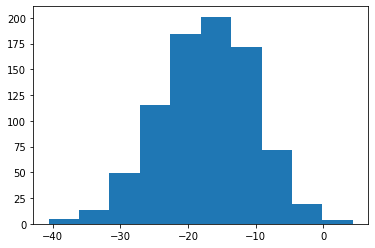

In [ ]:
plt.hist(features['mfcc'])

plt.show()

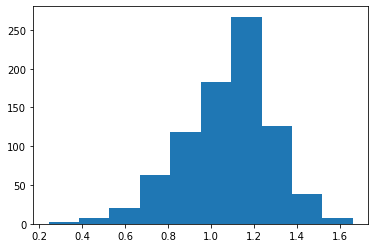

In [ ]:
plt.hist(features['onset_env'])
plt.show()

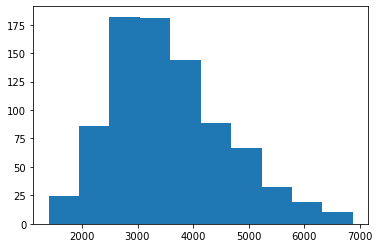

In [ ]:
plt.hist(features['Spec_Bandwidth'])
plt.show()

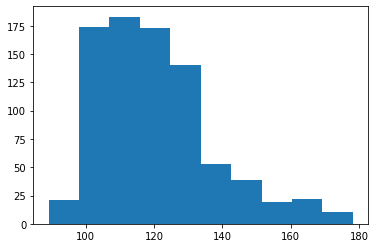

In [ ]:
plt.hist(features['tempo'])
plt.show()

**Get Target Labels**

In [ ]:
# Get target from dataframe
target = df.iloc[:, 0]


**Feature Seclection:**

**Features Correlation Coefficents**

The below correlation coefficients demonstrate that there is not a strong correlation between features, which means none will be removed. This is also shown in the heatmap below. 

In [ ]:
print("\nCorrelation coefficients:")
corr=features.corr()
corr




Correlation coefficients:


mfcc  onset_env  Spec_Bandwidth     tempo
mfcc            1.000000   0.314125       -0.193054 -0.078023
onset_env       0.314125   1.000000        0.053865 -0.193298
Spec_Bandwidth -0.193054   0.053865        1.000000  0.059453
tempo          -0.078023  -0.193298        0.059453  1.000000

<AxesSubplot:>

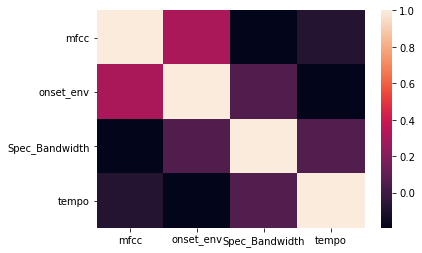

In [ ]:
import seaborn as sns
sns.heatmap(corr)

As shown below, all features meet the threshold value of 0.5 and thus will be inluded.

In [ ]:
threshold = corr[corr.iloc[:, :] >= 0.5]
threshold

mfcc  onset_env  Spec_Bandwidth  tempo
mfcc             1.0        NaN             NaN    NaN
onset_env        NaN        1.0             NaN    NaN
Spec_Bandwidth   NaN        NaN             1.0    NaN
tempo            NaN        NaN             NaN    1.0

**Create NumpPy Predictor array (X) and binary label(y)**

As shown below, there are 834 instances consisting of 4 features, stored in X and one binary label stored in y.

In [ ]:
#convert features to np array and create X predictor variable
X=np.array(features)

#convert target to np array and store in y label binary variable (Potter = True, StarWars = False)
y=np.array(target)=='Potter'


print(f'The shape of the X predictor is {X.shape}')
print(f'The shape of the y label is {y.shape}')

The shape of the X predictor is (834, 4)
The shape of the y label is (834,)


# 7. Results


Different ML  algorithms create classifiers using different biases, which can lead to varying performance.   As such, a Support Vector Machine (SVM)classification algorithm, K-nearest neighbour classification and StackingClassifier has been used below. 

**Split the data into training and validation**

In [ ]:
#Data Split
                  
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
                  
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((667, 4), (167, 4), (667,), (167,))

**Scale the data using MinMaxScale**

**Scale the training data**:

In [ ]:
scaler=MinMaxScaler()

In [ ]:
#scale training data
X_train_norm=scaler.fit_transform(X_train)

**Scale the validation data**:

In [ ]:
#scale validation data
scaler=MinMaxScaler()
X_val_norm=scaler.fit_transform(X_val)

## **Model 1: Support Vector Machine (SVM)**

**Fit the model and validate**

In [ ]:
#set parameters
clf_svm = svm.SVC(C=1.0,kernel='rbf',gamma='scale')
#fit model to training data. 
clf_svm.fit(X_train_norm,y_train)
#print accuracy
print(f'Training Accuracy:{clf_svm.score(X_train_norm,y_train)}')
print(f'Validation Accuracy {clf_svm.score(X_val_norm,y_val)}')

Training Accuracy:0.7841079460269865
Validation Accuracy 0.7724550898203593


**SVM Classification Report**

As shown below, Potter had the best recall, resulting in a 78% of all labels being correctly predicted. However the predicted label Potter appears to be most confused with true label Starwars, resulting in the lowest precision. SVM matthews correlation coefficient  0.54 indicating correlation (A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction). 

In [ ]:
SVM_y_preds=clf_svm.predict(X_val_norm)
SVM_y_preds=list(SVM_y_preds)

In [ ]:
print(classification_report(y_val, SVM_y_preds,target_names=['StarWars','Potter']))
svm_train_accuracy=accuracy_score(y_val, SVM_y_preds)
svm_MC=matthews_corrcoef(y_val, SVM_y_preds)
print(f'\n SVM matthews_corrcoef : {svm_MC}')

              precision    recall  f1-score   support

    StarWars       0.78      0.76      0.77        84
      Potter       0.76      0.78      0.77        83

    accuracy                           0.77       167
   macro avg       0.77      0.77      0.77       167
weighted avg       0.77      0.77      0.77       167


 SVM matthews_corrcoef : 0.5451154840193374


**SVM Confusion Matrix**

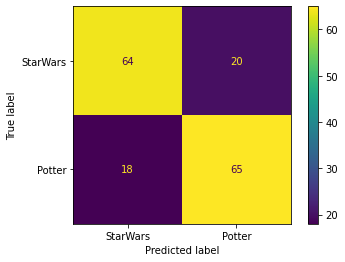

In [ ]:
cm=confusion_matrix(y_val, SVM_y_preds)
cmd_obj=ConfusionMatrixDisplay(cm,display_labels=['StarWars','Potter'])
cmd_obj.plot()

## **Model 2: KNeighborsClassifier (KNN)**

**Fit the model and validate**

As shown below, the training model is overfitting as it it reporting a higher accuracy than the validation data. 3 ***k*** was number of neighbors was used. Validation Accuracy is lower than the SVM model above. Training accuracy is higher then the SVM model but there is more overfitting apparent.

In [ ]:
knn = KNeighborsClassifier(3)
knn.fit(X_train_norm,y_train)

print(f'Training Accuracy:{knn.score(X_train_norm,y_train)}')
print(f'Validation Accuracy {knn.score(X_val_norm,y_val)}')

Training Accuracy:0.8335832083958021
Validation Accuracy 0.7664670658682635


As shown below, predicted label StarWars appears to be most confused with true label Potter (25 occurances where predicted StarWars label was confused with true label Potter). Predicted label Starwars had the best recall, resulting in a 83% of all Starwars true labels being correctly predicted.

**KNN Clasification Report**

In [ ]:
knn_y_preds=knn.predict(X_val_norm)
knn_y_preds=list(knn_y_preds)
print(classification_report(y_val, y_preds,target_names=['StarWars','Potter']))
knn_train_accuracy=accuracy_score(y_val, knn_y_preds) # print out accurate macro score
knn_MC=matthews_corrcoef(y_val, knn_y_preds)
print(f'\n KNN matthews_corrcoef : {knn_MC}')

              precision    recall  f1-score   support

    StarWars       0.74      0.83      0.78        84
      Potter       0.81      0.70      0.75        83

    accuracy                           0.77       167
   macro avg       0.77      0.77      0.77       167
weighted avg       0.77      0.77      0.77       167


 KNN matthews_corrcoef : 0.537238551556973


**KNN Confusfion Matrix**

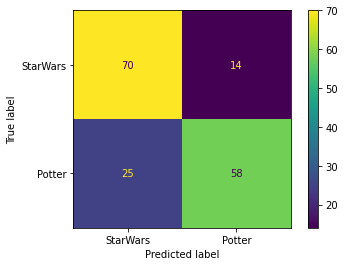

In [ ]:
cm=confusion_matrix(y_val, knn_y_preds)
cmd_obj=ConfusionMatrixDisplay(cm,display_labels=['StarWars','Potter'])
cmd_obj.plot()

## **Model 3: Stacking Ensemble:**

The stacking ensemble below did not provide any better results than the SVM classifier. 

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

#set estimators (above models)
estimators = [
('clf_svm',clf_svm),
('knn', knn)
]

#build stack model

stacking_model = StackingClassifier(
   estimators=estimators,final_estimator=LogisticRegression())

stacking_model.fit(X_train_norm, y_train)

print(f'Training Accuracy:{stacking_model.score(X_train_norm,y_train)}')
print(f'Validation Accuracy {stacking_model.score(X_val_norm,y_val)}')


Training Accuracy:0.8050974512743628
Validation Accuracy 0.7664670658682635


In [ ]:
ensemble_y_preds=stacking_model.predict(X_val_norm)
ensemble_y_preds=list(ensemble_y_preds)
print(classification_report(y_val, ensemble_y_preds,target_names=['StarWars','Potter']))
stacking_classifier_train_accuracy=accuracy_score(y_val, ensemble_y_preds)
stacking_MC=matthews_corrcoef(y_val, ensemble_y_preds)
print(f'\n Stacking Classifier matthews_corrcoef : {stacking_MC}')

              precision    recall  f1-score   support

    StarWars       0.76      0.77      0.77        84
      Potter       0.77      0.76      0.76        83

    accuracy                           0.77       167
   macro avg       0.77      0.77      0.77       167
weighted avg       0.77      0.77      0.77       167


 Stacking Classifier matthews_corrcoef : 0.5329221113504838


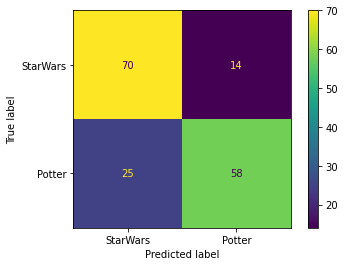

In [ ]:
cm=confusion_matrix(y_val, y_preds)
cmd_obj=ConfusionMatrixDisplay(cm,display_labels=['StarWars','Potter'])
cmd_obj.plot()

# 8. Conclusions

In [ ]:
print('\n Performance Summary:')

print(f'\n F1-score:')
print(f'\n SVM training accuracy : {svm_train_accuracy}')

print (f'\n KNN training accuracy : {knn_train_accuracy}')

print(f'\n Stacking Classifier training accuracy : {stacking_classifier_train_accuracy}')

print('--------------------------------------------------------')

print(f'\n Matthews correlation coefficient:')
print(f'\n SVM matthews_corrcoef : {svm_MC}')

print(f'\n KNN matthews_corrcoef : {knn_MC}')


print(f'\n Stacking Classifier matthews_corrcoef : {stacking_MC}')
print('--------------------------------------------------------')


 Performance Summary:

 F1-score:

 SVM training accuracy : 0.7724550898203593

 KNN training accuracy : 0.7664670658682635

 Stacking Classifier training accuracy : 0.7664670658682635
--------------------------------------------------------

 Matthews correlation coefficient:

 SVM matthews_corrcoef : 0.5451154840193374

 KNN matthews_corrcoef : 0.537238551556973

 Stacking Classifier matthews_corrcoef : 0.5329221113504838
--------------------------------------------------------


## **Model Evaluation**: Summary 

As shown above, the **SVM Classifier**, produced the **best accuracy (0.772)**. It also has the **highest MCC**. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. 
The **MCC score of 0.54** for the SVM model **corroborates** its performance as the **best model** from the models tested. 


***It should be noted that the macro average recall and precision for each model has not seen any large differences, with all averaging 0.77 for both macro average precision and macro average recall***.


## **Sugested Improvements**: 


To improve the performance of the model, the following should be considered:

**Model hyperparameters**: Each of the above models hyperparameters could be optimised using K-fold cross validation. The best hyperparameters were selected and used to fit each classifier to the training dataset.

**Feature Extraction**: further signal processing features could be explored and extracted to possibilty improve  classification perfomance. 

**Class Balance** although the binary class label was balanced, within class imbalances where indentifed in the sample. These within class imbalances where in relatoin to Hum and Whistle. Within class balancing could be implemented to improve the model perfomance. 